<a href="https://colab.research.google.com/github/juno-yuu/COVID-Vaccine-and-Biotech-industry/blob/Erin/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/juno-yuu/COVID-Vaccine-and-Biotech-industry.git

fatal: destination path 'COVID-Vaccine-and-Biotech-industry' already exists and is not an empty directory.


In [52]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# vaccination dataset
vacci = pd.read_csv("/content/COVID-Vaccine-and-Biotech-industry/us_state_vaccinations.csv")

# Data Cleaning and Selection

In [4]:
# vacci = vacci.dropna()

In [5]:
vacci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8148 entries, 0 to 8147
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 8148 non-null   object 
 1   location                             8148 non-null   object 
 2   total_vaccinations                   7878 non-null   float64
 3   total_distributed                    7747 non-null   float64
 4   people_vaccinated                    7735 non-null   float64
 5   people_fully_vaccinated_per_hundred  7260 non-null   float64
 6   total_vaccinations_per_hundred       7362 non-null   float64
 7   people_fully_vaccinated              7653 non-null   float64
 8   people_vaccinated_per_hundred        7337 non-null   float64
 9   distributed_per_hundred              7349 non-null   float64
 10  daily_vaccinations_raw               8083 non-null   float64
 11  daily_vaccinations            

In [6]:
# check the locations included in the dataset
vacci.location.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'Bureau of Prisons', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'Dept of Defense', 'District of Columbia',
       'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indian Health Svc', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Long Term Care', 'Louisiana',
       'Maine', 'Marshall Islands', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York State', 'North Carolina', 'North Dakota',
       'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Republic of Palau', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'United States', 'Utah', 'Vermont', 'Veterans Health',
       'Virgin Islands', 'Virginia', 'Washington', 'West V

In [7]:
# keep stats level data
vacci = vacci[vacci.location != 'United States']

In [8]:
# # fill with previous value
# vacci.fillna(method='ffill') 

> Check the daily trend.

In [30]:
vacci['daily_vaccinations_lagged'] = vacci['daily_vaccinations'].shift(1)
test = vacci.dropna()

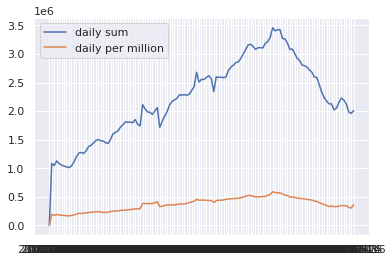

In [24]:
comb = vacci.groupby(by = 'date').sum()
tbp = comb.reset_index()
sns.set_theme()
plt.plot(tbp['date'], tbp['daily_vaccinations'], label = 'daily sum')
plt.plot(tbp['date'], tbp['daily_vaccinations_per_million'], label = 'daily per million')
plt.legend()
plt.show()

> Lagged data:

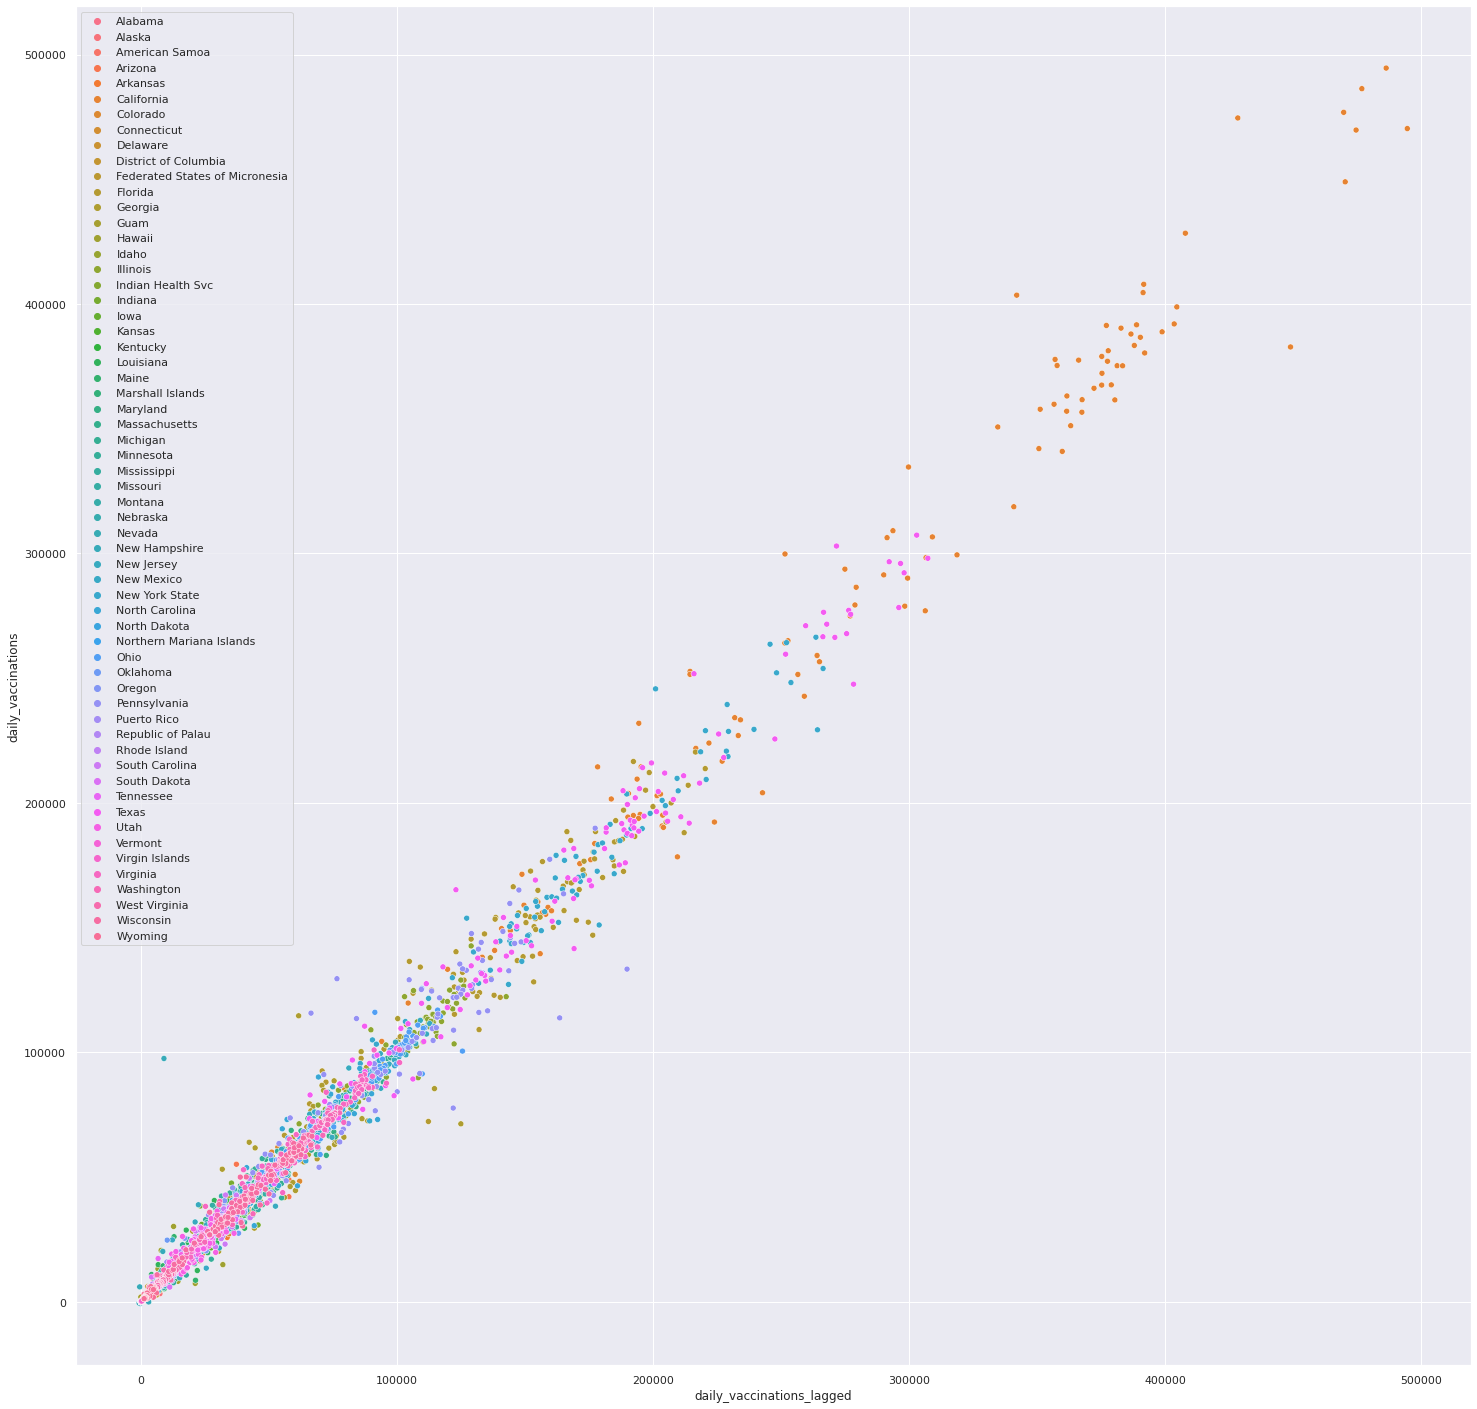

In [41]:
plt.figure(figsize = [25, 25])
ax = sns.scatterplot(x = 'daily_vaccinations_lagged', y = 'daily_vaccinations', data = test, hue = 'location', legend = 'brief')
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.legend(loc = 2)

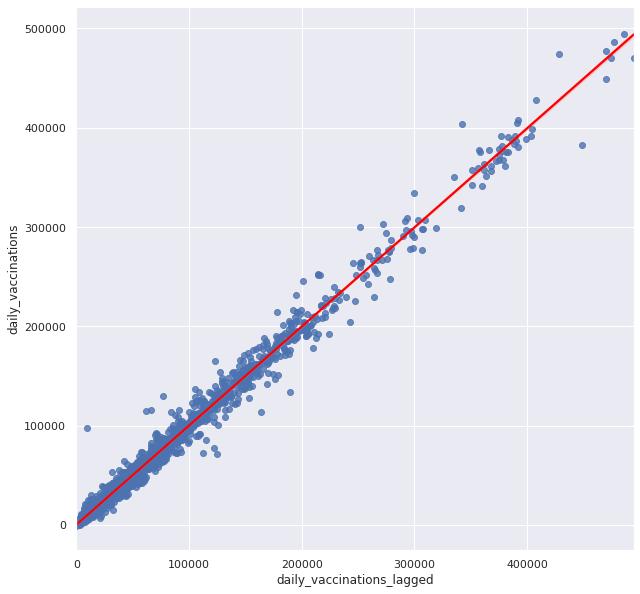

In [48]:
plt.figure(figsize = [10, 10])
_ = sns.regplot(x = 'daily_vaccinations_lagged', y = 'daily_vaccinations', data = test, line_kws={'color':'red'})

> Linear Regression: (lag one day)

In [11]:
data_selected = comb[['daily_vaccinations', 'daily_vaccinations_per_million']]

In [13]:
data_selected_lag = data_selected.shift(periods = 1)

In [16]:
tbreg = data_selected.join(data_selected_lag, on = 'date', how = 'inner', rsuffix = '_lagged').dropna()

In [17]:
tbreg.head()

,daily_vaccinations,daily_vaccinations_per_million,daily_vaccinations_lagged,daily_vaccinations_per_million_lagged
date,,,,
2021-01-13,1083727.0,191029.0,0.0,0.0
2021-01-14,1047786.0,176936.0,1083727.0,191029.0
2021-01-15,1128409.0,190744.0,1047786.0,176936.0
2021-01-16,1083109.0,182231.0,1128409.0,190744.0
2021-01-17,1055937.0,177160.0,1083109.0,182231.0


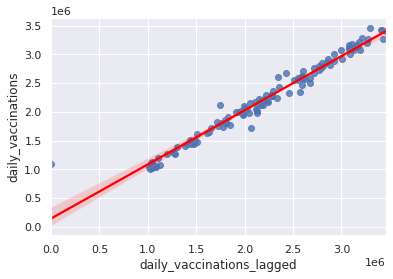

In [50]:
plt.figure()
ax = sns.regplot(x = 'daily_vaccinations_lagged', y = 'daily_vaccinations', data = tbreg, line_kws={'color':'red'})

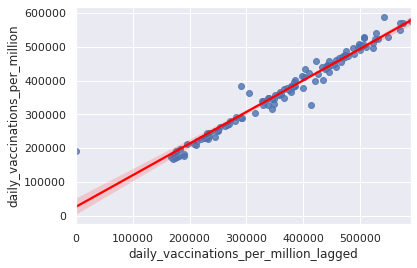

In [51]:
plt.figure()
ax = sns.regplot(x = 'daily_vaccinations_per_million_lagged', y = 'daily_vaccinations_per_million', data = tbreg, line_kws={'color':'red'})

In [55]:
linear_model = sm.OLS(tbreg['daily_vaccinations'], tbreg['daily_vaccinations_lagged']).fit()
linear_model.params

daily_vaccinations_lagged    1.001471
dtype: float64